In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from math import sqrt

from datetime import datetime
import pandas as pd
import numpy as np
import pdb


from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import homogeneity_score, completeness_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import homogeneity_score

from dtaidistance import dtw

from collections import Counter

from scipy.stats import pearsonr

In [2]:
words = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/50words_TEST.csv',
                   header = None)

In [3]:
words.rename(columns = {0:'word'}, inplace = True) 

In [4]:
words.head()

,word,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,4,-0.89094,-0.86099,-0.82438,-0.78214,-0.73573,-0.68691,-0.63754,-0.589370,-0.543420,...,-0.86309,-0.86791,-0.87271,-0.87846,-0.88592,-0.89619,-0.90783,-0.91942,-0.93018,-0.93939
1,12,-0.78346,-0.68562,-0.58409,-0.47946,-0.37398,-0.27008,-0.17225,-0.087463,-0.019191,...,-0.88318,-0.89189,-0.90290,-0.91427,-0.92668,-0.93966,-0.95244,-0.96623,-0.98050,-0.99178
2,13,-1.32560,-1.28430,-1.21970,-1.15670,-1.09980,-1.04960,-1.01550,-0.996720,-0.985040,...,-0.83499,-0.86204,-0.88559,-0.90454,-0.93353,-0.99135,-1.06910,-1.13680,-1.19800,-1.27000
3,23,-1.09370,-1.04200,-0.99840,-0.95997,-0.93997,-0.93764,-0.92649,-0.857090,-0.693320,...,-0.72810,-0.74512,-0.76376,-0.78068,-0.80593,-0.84350,-0.89531,-0.96052,-1.05090,-1.12830
4,4,-0.90138,-0.85228,-0.80196,-0.74932,-0.69298,-0.63316,-0.57038,-0.506920,-0.446040,...,-0.95452,-0.97322,-0.98984,-1.00520,-1.01880,-1.02960,-1.03700,-1.04110,-1.04180,-1.04030


In [5]:
words_features = words.iloc[:, 1:271]
X = words.iloc[:, 1:271].values


Text(0.5, 0.8, 'Słowo nr 9')

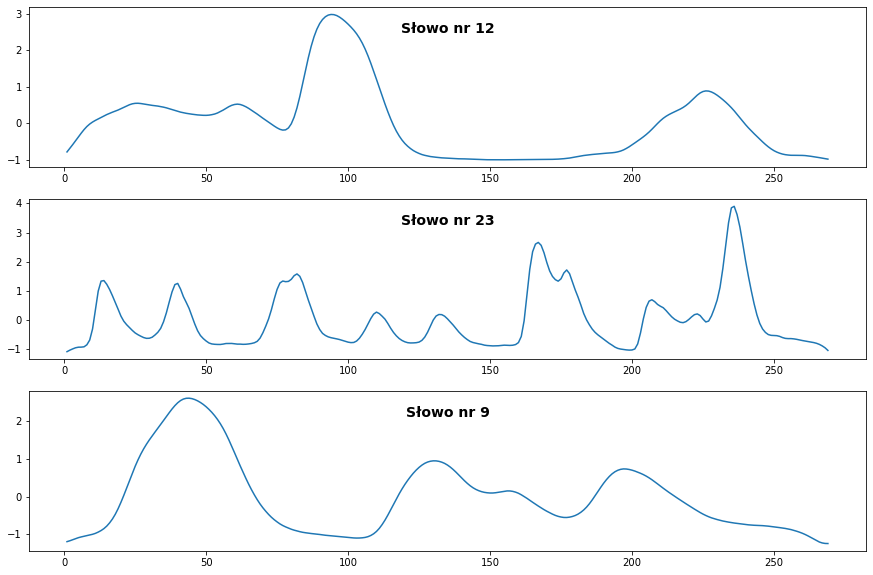

In [11]:
## Rysowanie pierwszych wykresów 

plt.subplot(3, 1, 1)
plt.plot(words.iloc[1, 1:-1])
plt.title("Słowo nr " + str(words.word[1]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 1, 2)
plt.plot(words.iloc[3, 1:-1])
plt.title("Słowo nr " + str(words.word[3]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 1, 3)
plt.plot(words.iloc[11, 1:-1])
plt.title("Słowo nr " + str(words.word[11]), fontweight = 'bold', y = 0.8, fontsize = 14)



Text(0.5, 0.98, 'Próbki projekcji słów wraz z ich histogramami')

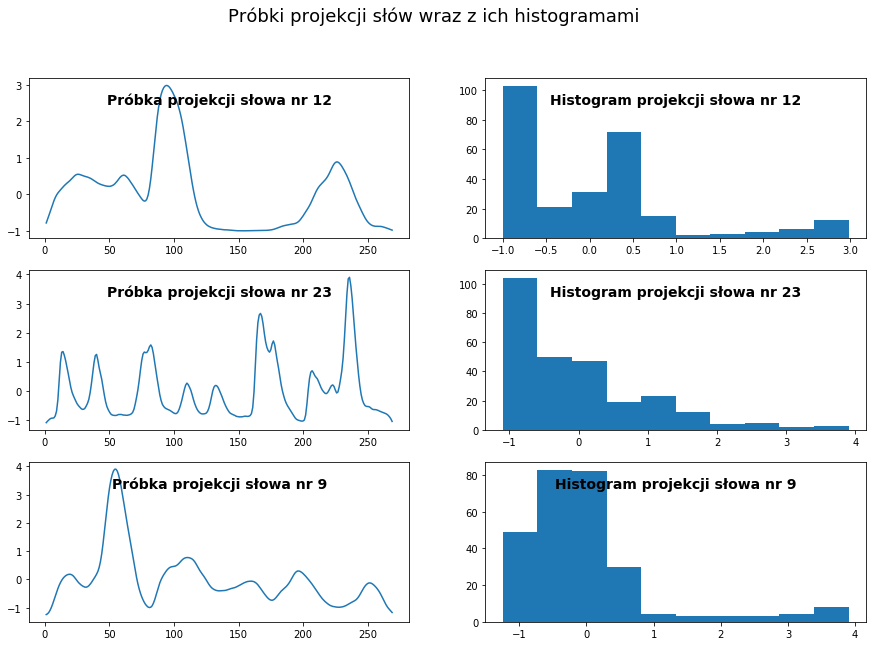

In [12]:
## Wykresy wraz z histogramami 
plt.subplot(3, 2, 1)
plt.plot(words.iloc[1, 1:-1])
plt.title("Próbka projekcji słowa nr " + str(words.word[1]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 2)
plt.hist(words.iloc[1, 1:-1], 10)
plt.title("Histogram projekcji słowa nr " + str(words.word[1]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 3)
plt.plot(words.iloc[3, 1:-1])
plt.title("Próbka projekcji słowa nr " + str(words.word[3]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 4)
plt.hist(words.iloc[3, 1:-1], 10)
plt.title("Histogram projekcji słowa nr " + str(words.word[3]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 5)
plt.plot(words.iloc[5, 1:-1])
plt.title("Próbka projekcji słowa nr " + str(words.word[11]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 6)
plt.hist(words.iloc[5, 1:-1], 10)
plt.title("Histogram projekcji słowa nr " + str(words.word[11]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.suptitle("Próbki projekcji słów wraz z ich histogramami", fontsize = 18)



Text(0, 0.5, 'Wartość')

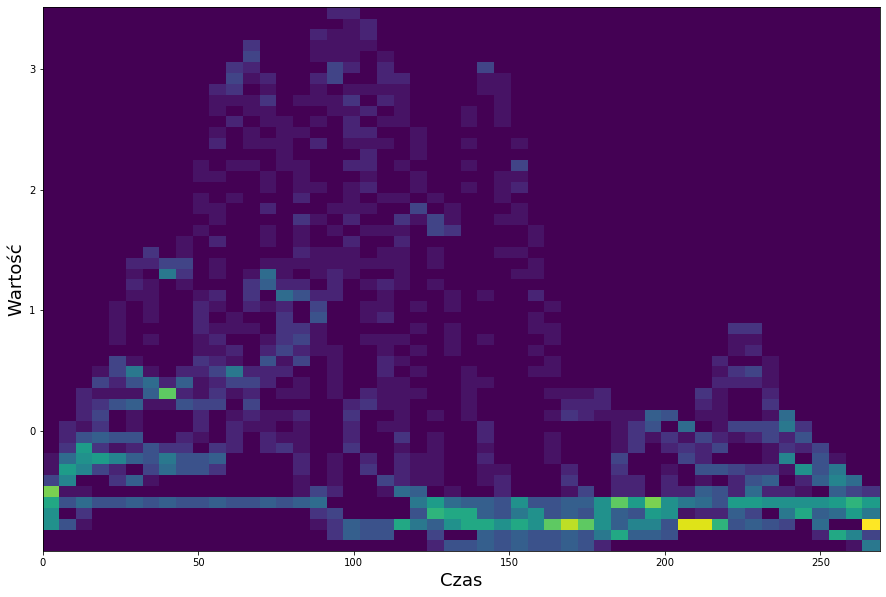

In [13]:
## Histogram słowo 12

## Możemy również rozważyć dwuwymiarowy histogram próbek konkretnego słowa
x = np.array([])
y = np.array([])

w = 12
selected_words = words[words.word == w]
selected_words.shape

for idx, row in selected_words.iterrows():
    y = np.hstack([y, row[1:271]])
    x = np.hstack([x, np.array(range(270))])
    
fig, ax = plt.subplots()
hist = ax.hist2d(x, y, bins = 50)
plt.xlabel("Czas", fontsize = 18)
plt.ylabel("Wartość", fontsize = 18)

Text(0, 0.5, 'Wartość')

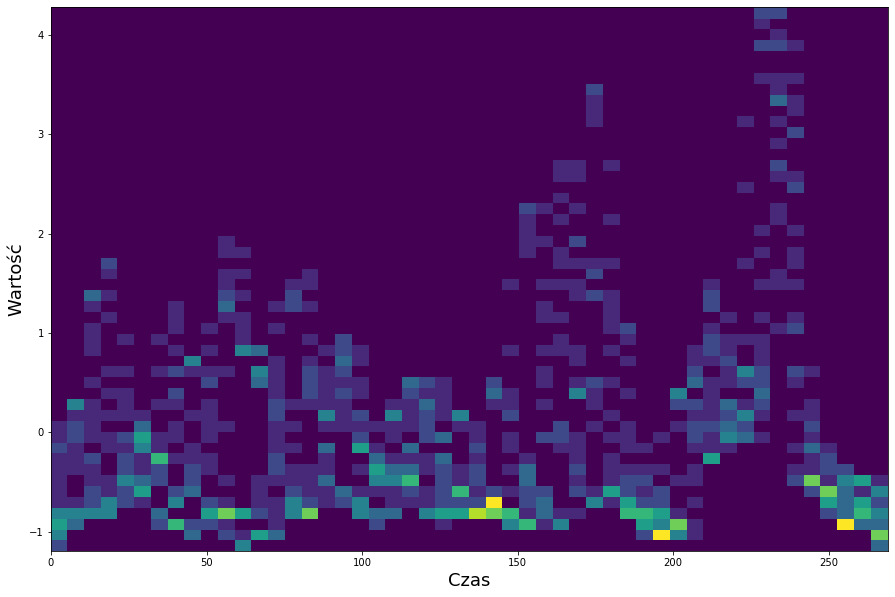

In [14]:
## Histogram słowo 23

## Możemy również rozważyć dwuwymiarowy histogram próbek konkretnego słowa
x = np.array([])
y = np.array([])

w = 23
selected_words = words[words.word == w]
selected_words.shape

for idx, row in selected_words.iterrows():
    y = np.hstack([y, row[1:271]])
    x = np.hstack([x, np.array(range(270))])
    
fig, ax = plt.subplots()
hist = ax.hist2d(x, y, bins = 50)
plt.xlabel("Czas", fontsize = 18)
plt.ylabel("Wartość", fontsize = 18)

In [15]:
from cesium.featurize import featurize_time_series as ft

word_vals = words.iloc[:, 1:271]
times = []
word_values = []
for idx, row in word_vals.iterrows():
    word_values.append(row.values)
    times.append(np.array([i for i in range(row.values.shape[0])]))
features_to_use = ['amplitude',
                   'percent_beyond_1_std',
                   'percent_close_to_median']
featurized_words = ft(times = times,
                      values = word_values,
                      errors = None,
                      features_to_use = features_to_use,
                      scheduler = None)


In [16]:
## Stwórzmy kilka cech na podstawie histogramu
times = []
hist_values = []
for idx, row in words_features.iterrows():
    hist_values.append(np.histogram(row.values,
                                    bins=10,
                                    range=(-2.5, 5.0))[0] + .0001) ## Zera powodują problemy na późniejszych etapach pracy
    times.append(np.array([i for i in range(9)]))
features_to_use = ["amplitude",
                   "percent_close_to_median",
                   "skew" ]
featurized_hists = ft(times = times,
                      values = hist_values,
                      errors = None,
                      features_to_use = features_to_use,
                      scheduler = None)


In [18]:
features = pd.concat([featurized_words.reset_index (drop = True),
                      featurized_hists],
                      axis = 1)


In [19]:
def distDTW(ts1, ts2):
   ## Przygotowanie odpowiedniej struktury
    DTW={}
    for i in range(len(ts1)):
        DTW[(i, -1)] = np.inf
    for i in range(len(ts2)):
        DTW[(-1, i)] = np.inf
    DTW[(-1, -1)] = 0

    ## Obliczanie optimum „krok po kroku”
    for i in range(len(ts1)):
        for j in range(len(ts2)):
            dist = (ts1[i] - ts2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)], DTW[(i, j-1)], DTW[(i-1, j-1)])
            ## Fragment ten jest przykładem programowania dynamicznego

    ## Po ustaleniu pełnej ścieżki zawracamy jej długość
    return sqrt(DTW[len(ts1)-1, len(ts2)-1])


In [21]:
## Klasteryzacja oparta na znormalizowanych cechach

from sklearn import preprocessing
feature_values = preprocessing.scale(features.values)


In [22]:
from sklearn.cluster import AgglomerativeClustering
feature_clustering = AgglomerativeClustering(n_clusters = 50, linkage    = 'ward')
feature_clustering.fit(feature_values)
words['feature_labels'] = feature_clustering.fit_predict(feature_values)


In [23]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(words.word, words.feature_labels)


0.5085776345414814

In [24]:
## Klasteryzacja oparta na algorytmie DTW



p = pairwise_distances(X, metric = distDTW)
## Operacja zajmuje trochę czasu, dlatego warto na przyszłość zapisać jej rezultat
with open("pairwise_word_distances.npy", "wb") as f:
    np.save(f, p)

In [25]:
from sklearn.cluster import AgglomerativeClustering
dtw_clustering = AgglomerativeClustering(linkage = 'average', n_clusters = 50, affinity = 'precomputed')
words['dtw_labels'] = dtw_clustering.fit_predict(p)

In [26]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score

homogeneity_score(words.word, words.dtw_labels)
completeness_score(words.word, words.dtw_labels)

0.771348780383979